In [1]:
import numpy as np
import pandas as pd
from os.path import join
import matplotlib.pyplot as plt
from matplotlib import gridspec

In [2]:
# some plotting hyperparameters
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'

In [3]:
truth_file="/home/rimichael/Uni/KU_BioInf/projects/gene_fusion/gene_fusion/truth/sim_50.truth_set.dat"
fusion_file="/home/rimichael/Uni/KU_BioInf/projects/gene_fusion/output/{sample}/{caller}/{filename}"

In [4]:
truth_df = pd.read_csv(truth_file, sep="|", header=None, names=("Sample", "FusionName"))

pd.DataFrame.head(truth_df)

,Sample,FusionName
0,sim_adipose,AADAT--VMP1
1,sim_adipose,ABCG1--GPSM3
2,sim_adipose,AC011530.4--IL4
3,sim_adipose,AC011997.1--SFMBT2
4,sim_adipose,AC024580.1--DDX3Y


In [5]:
adipose_star_f_file = fusion_file.format(sample="sim_adipose", caller="star_fusion", 
                                         filename="star-fusion.fusion_predictions.tsv")
adipose_fmap_file = fusion_file.format(sample="sim_adipose", caller="fmap", 
                                       filename="FusionDetection.FusionReport.Table.txt")
brain_star_f_file = fusion_file.format(sample="sim_brain", caller="star_fusion",
                                      filename="star-fusion.fusion_predictions.tsv")
brain_fmap_file = fusion_file.format(sample="sim_brain", caller="fmap",
                                    filename="FusionDetection.FusionReport.Table.txt")

In [6]:
adi50_star_fusion = pd.read_csv(adipose_star_f_file, sep="\t")
adi50_fmap_fusion = pd.read_csv(adipose_fmap_file, sep="\t")
brain50_star_fusion = pd.read_csv(brain_star_f_file, sep="\t")
brain50_fmap_fusion = pd.read_csv(brain_fmap_file, sep="\t")

In [7]:
brain_starf_df = pd.DataFrame(brain50_star_fusion)
adi_starf_df = pd.DataFrame(adi50_star_fusion)
adi_starf_df

,#FusionName,JunctionReadCount,SpanningFragCount,SpliceType,LeftGene,LeftBreakpoint,RightGene,RightBreakpoint,JunctionReads,SpanningFrags,LargeAnchorSupport,FFPM,LeftBreakDinuc,LeftBreakEntropy,RightBreakDinuc,RightBreakEntropy,annots
0,WFDC5--MLF1,2224,11900,ONLY_REF_SPLICE,WFDC5^ENSG00000175121.11,chr20:45110374:-,MLF1^ENSG00000178053.18,chr3:158598080:+,"1179974_0_188155_447_199,16399479_0_188155_451...","7206711_0_188155_405_258,25376770_0_188155_343...",YES_LDAS,470.8000,GT,1.6402,AG,1.9656,"[""INTERCHROMOSOMAL[chr20--chr3]""]"
1,CWC22--CAPS,2213,11830,ONLY_REF_SPLICE,CWC22^ENSG00000163510.14,chr2:179970501:-,CAPS^ENSG00000105519.16,chr19:5914385:+,"3239309_0_43378_1092_308,16809646_1_43378_827_...","19427440_1_43378_929_264,16521453_0_43378_1183...",YES_LDAS,468.1000,GT,1.6729,AG,1.7465,"[""INTERCHROMOSOMAL[chr2--chr19]""]"
2,LRIT1--CEP126,2188,11488,ONLY_REF_SPLICE,LRIT1^ENSG00000148602.5,chr10:84237220:-,CEP126^ENSG00000110318.14,chr11:101997599:+,"6863303_1_86004_394_303,10925920_0_86004_370_2...","12790173_0_86004_498_228,3514192_0_86004_507_2...",YES_LDAS,455.8666,GT,1.8323,AG,1.2729,"[""INTERCHROMOSOMAL[chr10--chr11]""]"
3,PROP1--FLRT1,2389,11186,ONLY_REF_SPLICE,PROP1^ENSG00000175325.2,chr5:177994106:-,FLRT1^ENSG00000126500.3,chr11:64116219:+,"5334279_1_119402_2928_261,14262890_1_119402_28...","304039_0_119402_445_249,7123300_1_119402_2881_...",YES_LDAS,452.5000,GT,1.8256,AG,1.9899,"[""INTERCHROMOSOMAL[chr5--chr11]""]"
4,TPM2--RAPH1,2325,10684,ONLY_REF_SPLICE,TPM2^ENSG00000198467.15,chr9:35685269:-,RAPH1^ENSG00000173166.18,chr2:203448079:-,"5508115_1_178567_237_241,24653511_1_178567_241...","5827564_1_178567_104_270,22237492_1_178567_86_...",YES_LDAS,433.6333,GT,1.7232,AG,1.9656,"[""INTERCHROMOSOMAL[chr9--chr2]""]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,TAF13--FGFBP1,1,2,ONLY_REF_SPLICE,TAF13^ENSG00000197780.9,chr1:109066135:-,FGFBP1^ENSG00000137440.4,chr4:15936652:-,20544099_1_170832_868_242,"12064694_1_170832_1038_270,14785655_0_170832_7...",NO_LDAS,0.1000,GT,1.8323,AG,1.9086,"[""INTERCHROMOSOMAL[chr1--chr4]""]"
420,CNTNAP2--MAT2A,1,2,ONLY_REF_SPLICE,CNTNAP2^ENSG00000174469.23,chr7:148172478:+,MAT2A^ENSG00000168906.13,chr2:85541829:+,12596964_1_36462_2077_241,"15129396_1_36462_2198_271,11997222_0_36462_459...",NO_LDAS,0.1000,GT,1.8892,AG,1.8323,"[""INTERCHROMOSOMAL[chr7--chr2]""]"
421,DDHD1--PIGB,1,2,ONLY_REF_SPLICE,DDHD1^ENSG00000100523.14,chr14:53103683:-,PIGB^ENSG00000069943.10,chr15:55341738:+,19905915_0_45513_250_247,"11093635_1_45513_625_263,17767996_0_45513_382_271",NO_LDAS,0.1000,GT,1.5058,AG,1.9656,"[""INTERCHROMOSOMAL[chr14--chr15]""]"
422,ADGRG2--FCRL3,1,2,ONLY_REF_SPLICE,ADGRG2^ENSG00000173698.18,chrX:18996051:-,FCRL3^ENSG00000160856.21,chr1:157700585:-,22021028_0_66436_2718_263,"20029781_0_66436_2525_274,8451575_0_66436_2652...",YES_LDAS,0.1000,GT,1.9329,AG,1.9656,"[""INTERCHROMOSOMAL[chrX--chr1]""]"


In [8]:
brain_fmap_df = pd.DataFrame(brain50_fmap_fusion)
adi_fmap_df = pd.DataFrame(adi50_fmap_fusion)
adi_fmap_df

,FusionID,sim_adipose.bam.UniqueCuttingPositionCount,sim_adipose.bam.SeedCount,sim_adipose.bam.RescuedCount,Strand,Chromosome1,Position1,Chromosome2,Position2,KnownGene1,...,KnownTranscriptStrand2,FusionJunctionSequence,FusionGene,SplicePattern,SplicePatternClass,FrameShift,FrameShiftClass,Distance,OnExonBoundary,Filter
0,FUS_948591_242220111(--),4,19,1,--,1,948592,1,242220112,NOC2L,...,----,ACACGGCCCTTGGGGCAGATGTTCCAGCAG@ccgaggtgacgtaca...,NOC2L->PLD5,GT-AG,CanonicalPattern[Major],2->1,FrameShift,241271520,None,NaN
1,FUS_3755566_2048525012(++),7,3,5,++,1,3755567,12,104756949,CCDC27,...,++,CCAGGCGGGGCTCAGACACGAACGTGGACG@ctggagctctcaaac...,CCDC27->CHST11,GT-AG,CanonicalPattern[Major],0->0,FrameShift,-1,Both,NaN
2,FUS_6419852_1920875400(+-),3,1,3,+-,11,112193993,1,6419853,BCO2,...,-,CCGCGGGGAAGCGGTGGCAGCTGCGAGCCC@ttttctgttttttcc...,BCO2->HES2,GG-TG,NonCanonicalPattern,1->,InFrame,-1,None,NaN
3,FUS_9744004_1875380046(++),33,103,53,--,11,66698639,1,9744005,SPTBN2,...,---,CATAGAGGGAGTAGTGGTGCCGATTCATAT@cttgtccaccttgtc...,SPTBN2->CLSTN1,GT-AG,CanonicalPattern[Major],2->1,FrameShift,-1,Both,NaN
4,FUS_9744395_1875380048(++),5,7,0,--,11,66698641,1,9744396,SPTBN2,...,---,GGCATCGCTTGCAGAGCTATTACCCTACCT@tgtccaccttgtcca...,SPTBN2->CLSTN1,AG-AC,NonCanonicalPattern,0->2,FrameShift,-1,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669,FUS_2712691050_2855322217(+-),25,64,23,+-,19,58279147,22,31138410,"ZNF8,ZNF8-ERVK3-1",...,-,TCTGTGGGGCCGCCGGCGGCCCGGCTTCAG@gtttcagcaatgcct...,"ZNF8,ZNF8-ERVK3-1->PLA2G3",GT-AG,CanonicalPattern[Major],2->2,FrameShift,-1,Both,NaN
670,FUS_2736595541_2946619762(--),39,155,113,--,20,23565974,X,71617459,CST9L,...,--,CATTTCCAAGAAAGCACAGAGCTGAACAAT@gtgagtgaccaccaa...,CST9L->CXCR3,GT-AG,CanonicalPattern[Major],2->0,InFrame,-1,Both,NaN
671,FUS_2758585268_3012571205(-+),10,4,8,-+,20,45555701,X,137568902,WFDC8,...,++,ATGCCTGCAGAACGGCCTGCATGTTAATTG@gtgagaaacctttca...,WFDC8->ZIC3,GT-AG,CanonicalPattern[Major],0->1,InFrame,-1,Both,NaN
672,FUS_2912806433_3120508529(+-),14,1,30,+-,X,37804130,6_GL000255v2_alt,3157298,CYBB,...,-,GGAGTTTCAAGATGCGTGGAAACTACCTAA@ggttgcccacccccg...,CYBB->ZBTB12,GT-AG,CanonicalPattern[Major],1->,InFrame,-1,Both,NaN


In [9]:
fcatcher_df = pd.read_csv("/home/rimichael/Uni/KU_BioInf/projects/gene_fusion/output/fcatcher/final-list_candidate-fusion-genes.txt", sep="\t")
fcatcher_df

,Gene_1_symbol(5end_fusion_partner),Gene_2_symbol(3end_fusion_partner),Fusion_description,Counts_of_common_mapping_reads,Spanning_pairs,Spanning_unique_reads,Longest_anchor_found,Fusion_finding_method,Fusion_point_for_gene_1(5end_fusion_partner),Fusion_point_for_gene_2(3end_fusion_partner),Gene_1_id(5end_fusion_partner),Gene_2_id(3end_fusion_partner),Exon_1_id(5end_fusion_partner),Exon_2_id(3end_fusion_partner),Fusion_sequence,Predicted_effect
0,PORCN,PROCR,t345,0,2220,69,45,BOWTIE+BLAT,X:48511935:+,20:35176699:+,ENSG00000102312,ENSG00000101000,NaN,NaN,CCTCAGTGAGATGCACATGGTAGACACCGTGACATGGCACAAGATG...,out-of-frame
1,PORCN,PROCR,"t345,exon-exon",0,2220,69,45,BOWTIE;BOWTIE+BLAT;BOWTIE+STAR,X:48511935:+,20:35176698:+,ENSG00000102312,ENSG00000101000,ENSE00003468117,ENSE00000860180,CCTCAGTGAGATGCACATGGTAGACACCGTGACATGGCACAAGATG...,in-frame
2,CASP3,SMAP2,"t273,exon-exon",0,2081,106,43,BOWTIE;BOWTIE+BLAT;BOWTIE+STAR,4:184632268:-,1:40408653:+,ENSG00000164305,ENSG00000084070,ENSE00001083266,ENSE00003569195,GAATAAAAATGATCTTACACGTGAAGAAATTGTGGAATTGATGCGT...,out-of-frame
3,ADH7,ZNF623,"t295,exon-exon",0,2041,113,45,BOWTIE;BOWTIE+BLAT;BOWTIE+STAR,4:99428492:-,8:143649898:+,ENSG00000196344,ENSG00000183309,ENSE00003512487,ENSE00002141959,AACTGGGATTGTAGAGAGCATTGGAGAAGGAGTGACTACAGTGAAA...,in-frame
4,THOC1,CCDC120,"t284,exon-exon",0,2032,96,43,BOWTIE;BOWTIE+BLAT;BOWTIE+STAR,18:218886:-,X:49064370:+,ENSG00000079134,ENSG00000147144,ENSE00003656092,ENSE00003714661,GAAGCCATTGAACAGGCAGACCCTGAAAATATGGTGGAAAATGAAT...,out-of-frame
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2720,WSB2,LY96,"t1,exon-exon",0,2,3,29,BOWTIE,12:118034986:-,8:74026789:+,ENSG00000176871,ENSG00000154589,ENSE00003627154,ENSE00001016734,TTTGCTGCACATTTTTTCCACATGGTGGAGTCATTGCCACAGG*AG...,out-of-frame
2721,XRCC1,MORC2,exon-exon,0,2,4,27,BOWTIE,19:43553609:-,22:30926871:-,ENSG00000073050,ENSG00000133422,ENSE00003611390,ENSE00001599797,TCATAGCCCCCCAGACAAAGATGAGGCAGAGGCCCCGTCCCAG*GA...,in-frame
2722,ZNF215,UBE2R2,"t1,exon-exon",0,2,2,26,BOWTIE,11:6932672:+,9:33917018:+,ENSG00000149054,ENSG00000107341,ENSE00003484544,ENSE00001257565,GTGACCCTCATAGAAGATGTGATTGAAATGCTTGAAGATGAAG*GA...,out-of-frame
2723,ZNF225,SSRP1,"t2,exon-exon",0,2,27,30,BOWTIE,19:44118314:+,11:57333149:-,ENSG00000256294,ENSG00000149136,ENSE00002489652,ENSE00000988946,CGAGAAGTGATGCTGGAGAACTTCAGGAACCTGCTCTCAGTGG*GG...,in-frame


In [26]:
f_unified_df = pd.DataFrame(columns=["FusionCaller", "Sample", "#FusionName", "LeftBreakpoint", "RightBreakpoint"])
f_unified_df["#FusionName"] = fcatcher_df["Gene_1_symbol(5end_fusion_partner)"].astype(str) + "--" + fcatcher_df["Gene_2_symbol(3end_fusion_partner)"].astype(str)
f_unified_df["LeftBreakpoint"] = "chr" + fcatcher_df["Fusion_point_for_gene_1(5end_fusion_partner)"]
f_unified_df["RightBreakpoint"] = "chr" + fcatcher_df["Fusion_point_for_gene_2(3end_fusion_partner)"]
f_unified_df["FusionCaller"] = "FusionCatcher"
f_unified_df["Sample"] = "sim_testis"
f_unified_df

,FusionCaller,Sample,#FusionName,LeftBreakpoint,RightBreakpoint
0,FusionCatcher,sim_testis,PORCN--PROCR,chrX:48511935:+,chr20:35176699:+
1,FusionCatcher,sim_testis,PORCN--PROCR,chrX:48511935:+,chr20:35176698:+
2,FusionCatcher,sim_testis,CASP3--SMAP2,chr4:184632268:-,chr1:40408653:+
3,FusionCatcher,sim_testis,ADH7--ZNF623,chr4:99428492:-,chr8:143649898:+
4,FusionCatcher,sim_testis,THOC1--CCDC120,chr18:218886:-,chrX:49064370:+
...,...,...,...,...,...
2720,FusionCatcher,sim_testis,WSB2--LY96,chr12:118034986:-,chr8:74026789:+
2721,FusionCatcher,sim_testis,XRCC1--MORC2,chr19:43553609:-,chr22:30926871:-
2722,FusionCatcher,sim_testis,ZNF215--UBE2R2,chr11:6932672:+,chr9:33917018:+
2723,FusionCatcher,sim_testis,ZNF225--SSRP1,chr19:44118314:+,chr11:57333149:-


In [11]:
trinity_df = pd.read_csv("/home/rimichael/Uni/KU_BioInf/projects/gene_fusion/output/sim_adipose/trinity/TrinityFusion-UC.fusion_predictions.tsv", sep="\t")
trinity_df.head()

,#FusionName,JunctionReadCount,SpanningFragCount,trans_acc,trans_brkpt,LeftGene,LeftBreakpoint,RightGene,RightBreakpoint,SpliceType,annots
0,CWC22--AC104532.1,3106,9681,TRINITY_DN195_c0_g1_i1,1065-1064,CWC22,chr2:179970501,AC104532.1,chr19:5914385,ONLY_REF_SPLICE,"[""INTERCHROMOSOMAL[chr2--chr19]""]"
1,CWC22--CAPS,3106,9681,TRINITY_DN195_c0_g1_i1,1065-1064,CWC22,chr2:179970501,CAPS,chr19:5914385,ONLY_REF_SPLICE,"[""INTERCHROMOSOMAL[chr2--chr19]""]"
2,WFDC5--MLF1,3041,9583,TRINITY_DN244_c0_g1_i1,471-472,WFDC5,chr20:45110374,MLF1,chr3:158598080,ONLY_REF_SPLICE,"[""INTERCHROMOSOMAL[chr20--chr3]""]"
3,LRIT1--CEP126,2883,9367,TRINITY_DN1134_c0_g1_i1,433-432,LRIT1,chr10:84237220,CEP126,chr11:101997599,ONLY_REF_SPLICE,"[""INTERCHROMOSOMAL[chr10--chr11]""]"
4,PID1--DAP,2831,8798,TRINITY_DN1140_c0_g1_i1,737-736,PID1,chr2:229155818,DAP,chr5:10681169,ONLY_REF_SPLICE,"[""INTERCHROMOSOMAL[chr2--chr5]""]"


In [12]:
t_unified_df = pd.DataFrame(columns=["FusionCaller", "Sample", "#FusionName", "LeftBreakpoint", "RightBreakpoint"])
t_unified_df["#FusionName"] = trinity_df["#FusionName"]
t_unified_df["LeftBreakpoint"] = trinity_df["LeftBreakpoint"]
t_unified_df["RightBreakpoint"] = trinity_df["RightBreakpoint"]
t_unified_df["FusionCaller"] = "TrinityFusion"
t_unified_df["Sample"] = "sim_adipose"
t_unified_df

,FusionCaller,Sample,#FusionName,LeftBreakpoint,RightBreakpoint
0,TrinityFusion,sim_adipose,CWC22--AC104532.1,chr2:179970501,chr19:5914385
1,TrinityFusion,sim_adipose,CWC22--CAPS,chr2:179970501,chr19:5914385
2,TrinityFusion,sim_adipose,WFDC5--MLF1,chr20:45110374,chr3:158598080
3,TrinityFusion,sim_adipose,LRIT1--CEP126,chr10:84237220,chr11:101997599
4,TrinityFusion,sim_adipose,PID1--DAP,chr2:229155818,chr5:10681169
...,...,...,...,...,...
334,TrinityFusion,sim_adipose,MFN1--FGFBP3,chr3:179368103,chr10:91909047
335,TrinityFusion,sim_adipose,TNFSF14--H3F3A,chr19:6667113,chr1:226071351
336,TrinityFusion,sim_adipose,RBM15--MLNR,chr1:110342268,chr13:49222040
337,TrinityFusion,sim_adipose,AP003068.2--NEDD1,chr11:65181225,chr12:96919985


#### Format
unified output should have: 

+ Caller
+ FusionName, 
+ Strand, 
+ PositionLeft (chr:Pos), 
+ PositionRight(chr:Pos)

In [13]:
# unify adipose
adi_unified_df = pd.DataFrame(columns = ["FusionCaller", "Sample", "#FusionName", "LeftBreakpoint", "RightBreakpoint"])
adi_unified_df["#FusionName"] = adi_fmap_df["FusionGene"].str.replace(".->.", "--", regex=True)
adi_unified_df["LeftBreakpoint"] = "chr" + adi_fmap_df["Chromosome1"].astype(str) + ":" + adi_fmap_df["Position1"].astype(str) + ":" + adi_fmap_df["Strand"].astype(str).str[0]
adi_unified_df["RightBreakpoint"] = "chr" + adi_fmap_df["Chromosome2"].astype(str) + ":" + adi_fmap_df["Position2"].astype(str) + ":" + adi_fmap_df["Strand"].astype(str).str[1]
adi_unified_df["Sample"] = "sim_adipose"
adi_unified_df["FusionCaller"] = "FusionMap"
adi_unified_df

,FusionCaller,Sample,#FusionName,LeftBreakpoint,RightBreakpoint
0,FusionMap,sim_adipose,NOC2--LD5,chr1:948592:-,chr1:242220112:-
1,FusionMap,sim_adipose,CCDC2--HST11,chr1:3755567:+,chr12:104756949:+
2,FusionMap,sim_adipose,BCO--ES2,chr11:112193993:+,chr1:6419853:-
3,FusionMap,sim_adipose,SPTBN--LSTN1,chr11:66698639:-,chr1:9744005:-
4,FusionMap,sim_adipose,SPTBN--LSTN1,chr11:66698641:-,chr1:9744396:-
...,...,...,...,...,...
669,FusionMap,sim_adipose,"ZNF8,ZNF8-ERVK3---LA2G3",chr19:58279147:+,chr22:31138410:-
670,FusionMap,sim_adipose,CST9--XCR3,chr20:23565974:-,chrX:71617459:-
671,FusionMap,sim_adipose,WFDC--IC3,chr20:45555701:-,chrX:137568902:+
672,FusionMap,sim_adipose,CYB--BTB12,chrX:37804130:+,chr6_GL000255v2_alt:3157298:-


In [14]:
# unify brain
brain_unified_df = pd.DataFrame(columns = ["FusionCaller", "Sample", "#FusionName", "LeftBreakpoint", "RightBreakpoint"])
brain_unified_df["#FusionName"] = brain_fmap_df["FusionGene"].str.replace(".->.", "--", regex=True)
brain_unified_df["LeftBreakpoint"] = "chr" + brain_fmap_df["Chromosome1"].astype(str) + ":" + brain_fmap_df["Position1"].astype(str) + ":" + brain_fmap_df["Strand"].astype(str).str[0]
brain_unified_df["RightBreakpoint"] = "chr" + brain_fmap_df["Chromosome2"].astype(str) + ":" + brain_fmap_df["Position2"].astype(str) + ":" + brain_fmap_df["Strand"].astype(str).str[1]
brain_unified_df["Sample"] = "sim_brain"
brain_unified_df["FusionCaller"] = "FusionMap"
brain_unified_df

,FusionCaller,Sample,#FusionName,LeftBreakpoint,RightBreakpoint
0,FusionMap,sim_brain,CAMK1--EGF6,chr10:12832171:+,chr1:3501216:-
1,FusionMap,sim_brain,ICM--AGE2,chr1:6223809:-,chrX:52375575:+
2,FusionMap,sim_brain,C16orf7--NFRSF25,chr16:49374089:+,chr1:6463127:-
3,FusionMap,sim_brain,ADGRE--BTB48,chr19:6937648:+,chr1:6587478:+
4,FusionMap,sim_brain,QK--ARK7,chr6:163535125:+,chr1:7962763:+
...,...,...,...,...,...
616,FusionMap,sim_brain,ARHGEF--EX4,chrX:63655736:-,chrX:103216151:+
617,FusionMap,sim_brain,ARHGEF--EX1,chrX:63674038:-,chrX:103063279:-
618,FusionMap,sim_brain,ARHGEF--EX4,chrX:63674038:-,chrX:103216149:+
619,FusionMap,sim_brain,ARHGEF--EX2,chrX:63674038:-,chrX:103309981:-


In [15]:
# select StarFusion Caller
adi_starf_df_select = pd.DataFrame(columns=["FusionCaller", "Sample", "#FusionName", "LeftBreakpoint", "RightBreakpoint"])
adi_starf_df_select["#FusionName"] = adi_starf_df["#FusionName"]
adi_starf_df_select["LeftBreakpoint"] = adi_starf_df["LeftBreakpoint"]
adi_starf_df_select["RightBreakpoint"] = adi_starf_df["RightBreakpoint"]
adi_starf_df_select["FusionCaller"] = "STAR-Fusion"
adi_starf_df_select["Sample"] = "sim_adipose"
adi_starf_df_select

,FusionCaller,Sample,#FusionName,LeftBreakpoint,RightBreakpoint
0,STAR-Fusion,sim_adipose,WFDC5--MLF1,chr20:45110374:-,chr3:158598080:+
1,STAR-Fusion,sim_adipose,CWC22--CAPS,chr2:179970501:-,chr19:5914385:+
2,STAR-Fusion,sim_adipose,LRIT1--CEP126,chr10:84237220:-,chr11:101997599:+
3,STAR-Fusion,sim_adipose,PROP1--FLRT1,chr5:177994106:-,chr11:64116219:+
4,STAR-Fusion,sim_adipose,TPM2--RAPH1,chr9:35685269:-,chr2:203448079:-
...,...,...,...,...,...
419,STAR-Fusion,sim_adipose,TAF13--FGFBP1,chr1:109066135:-,chr4:15936652:-
420,STAR-Fusion,sim_adipose,CNTNAP2--MAT2A,chr7:148172478:+,chr2:85541829:+
421,STAR-Fusion,sim_adipose,DDHD1--PIGB,chr14:53103683:-,chr15:55341738:+
422,STAR-Fusion,sim_adipose,ADGRG2--FCRL3,chrX:18996051:-,chr1:157700585:-


In [16]:
brain_starf_df_select = pd.DataFrame(columns=["FusionCaller", "Sample", "#FusionName", "LeftBreakpoint", "RightBreakpoint"])
brain_starf_df_select["#FusionName"] = brain_starf_df["#FusionName"]
brain_starf_df_select["LeftBreakpoint"] = brain_starf_df["LeftBreakpoint"]
brain_starf_df_select["RightBreakpoint"] = brain_starf_df["RightBreakpoint"]
brain_starf_df_select["FusionCaller"] = "STAR-Fusion"
brain_starf_df_select["Sample"] = "sim_brain"
brain_starf_df_select

,FusionCaller,Sample,#FusionName,LeftBreakpoint,RightBreakpoint
0,STAR-Fusion,sim_brain,TNFRSF11B--WDR49,chr8:118932931:-,chr3:167529239:-
1,STAR-Fusion,sim_brain,CLDND1--THYN1,chr3:98517052:-,chr11:134252916:-
2,STAR-Fusion,sim_brain,HTR3E--BMP10,chr3:184106343:+,chr2:68866571:-
3,STAR-Fusion,sim_brain,EP300--SRP14,chr22:41135906:+,chr15:40036500:-
4,STAR-Fusion,sim_brain,SVOPL--FDXACB1,chr7:138630049:-,chr11:111876104:-
...,...,...,...,...,...
413,STAR-Fusion,sim_brain,CAMK2B--CAMK2G,chr7:44242218:-,chr10:73842541:-
414,STAR-Fusion,sim_brain,EFCAB11--RAB3A,chr14:89932526:-,chr19:18200445:-
415,STAR-Fusion,sim_brain,METTL21C--LCORL,chr13:102690813:-,chr4:17886161:-
416,STAR-Fusion,sim_brain,LILRA4--GSG1L,chr19:54337936:-,chr16:27963203:-


In [27]:
unified_df = adi_unified_df.append(brain_unified_df).append(adi_starf_df_select).append(brain_starf_df_select).append(f_unified_df).append(t_unified_df)
unified_df

,FusionCaller,Sample,#FusionName,LeftBreakpoint,RightBreakpoint
0,FusionMap,sim_adipose,NOC2--LD5,chr1:948592:-,chr1:242220112:-
1,FusionMap,sim_adipose,CCDC2--HST11,chr1:3755567:+,chr12:104756949:+
2,FusionMap,sim_adipose,BCO--ES2,chr11:112193993:+,chr1:6419853:-
3,FusionMap,sim_adipose,SPTBN--LSTN1,chr11:66698639:-,chr1:9744005:-
4,FusionMap,sim_adipose,SPTBN--LSTN1,chr11:66698641:-,chr1:9744396:-
...,...,...,...,...,...
334,TrinityFusion,sim_adipose,MFN1--FGFBP3,chr3:179368103,chr10:91909047
335,TrinityFusion,sim_adipose,TNFSF14--H3F3A,chr19:6667113,chr1:226071351
336,TrinityFusion,sim_adipose,RBM15--MLNR,chr1:110342268,chr13:49222040
337,TrinityFusion,sim_adipose,AP003068.2--NEDD1,chr11:65181225,chr12:96919985


In [18]:
truth_select_df = truth_df[truth_df["Sample"].isin(["sim_adipose", "sim_brain"])]
truth_select_df

,Sample,FusionName
0,sim_adipose,AADAT--VMP1
1,sim_adipose,ABCG1--GPSM3
2,sim_adipose,AC011530.4--IL4
3,sim_adipose,AC011997.1--SFMBT2
4,sim_adipose,AC024580.1--DDX3Y
...,...,...
995,sim_brain,ZNF568--MALT1
996,sim_brain,ZNF652--PILRA
997,sim_brain,ZNF708--TOR1AIP2
998,sim_brain,ZSCAN5D--C5orf52


### Check which values are correct for each caller

In [28]:
unified_df_val = unified_df.copy()
unified_df_val["Fusion_Truth"] = unified_df_val["#FusionName"].isin(truth_select_df["FusionName"])
unified_df_val

,FusionCaller,Sample,#FusionName,LeftBreakpoint,RightBreakpoint,Fusion_Truth
0,FusionMap,sim_adipose,NOC2--LD5,chr1:948592:-,chr1:242220112:-,False
1,FusionMap,sim_adipose,CCDC2--HST11,chr1:3755567:+,chr12:104756949:+,False
2,FusionMap,sim_adipose,BCO--ES2,chr11:112193993:+,chr1:6419853:-,False
3,FusionMap,sim_adipose,SPTBN--LSTN1,chr11:66698639:-,chr1:9744005:-,False
4,FusionMap,sim_adipose,SPTBN--LSTN1,chr11:66698641:-,chr1:9744396:-,False
...,...,...,...,...,...,...
334,TrinityFusion,sim_adipose,MFN1--FGFBP3,chr3:179368103,chr10:91909047,True
335,TrinityFusion,sim_adipose,TNFSF14--H3F3A,chr19:6667113,chr1:226071351,True
336,TrinityFusion,sim_adipose,RBM15--MLNR,chr1:110342268,chr13:49222040,True
337,TrinityFusion,sim_adipose,AP003068.2--NEDD1,chr11:65181225,chr12:96919985,False


In [29]:
# missed fusions aka. not in the calls
truth_select_df[~truth_select_df["FusionName"].isin(unified_df_val["#FusionName"])]
# do that for both callers
fmap_calls = unified_df_val[unified_df_val["FusionCaller"]=="FusionMap"]
fus_calls = unified_df_val[unified_df_val["FusionCaller"]=="STAR-Fusion"]
print(len(truth_select_df[~truth_select_df["FusionName"].isin(fmap_calls["#FusionName"])]))

print(len(truth_select_df[~truth_select_df["FusionName"].isin(fus_calls["#FusionName"])]))

inv_truth = truth_select_df[~truth_select_df["FusionName"].isin(unified_df_val["#FusionName"])].groupby("Sample").count().reset_index()
inv_truth


1000
304


,Sample,FusionName
0,sim_adipose,73
1,sim_brain,75


In [30]:
fusion_truth = unified_df_val.groupby(["FusionCaller", "Sample", "Fusion_Truth"])[["#FusionName"]].count().unstack(fill_value=0).stack().reset_index()
print(fusion_truth)
print(fusion_truth[fusion_truth["#FusionName"]>0])

     FusionCaller       Sample  Fusion_Truth  #FusionName
0   FusionCatcher   sim_testis         False         1920
1   FusionCatcher   sim_testis          True          805
2       FusionMap  sim_adipose         False          674
3       FusionMap  sim_adipose          True            0
4       FusionMap    sim_brain         False          621
5       FusionMap    sim_brain          True            0
6     STAR-Fusion  sim_adipose         False           64
7     STAR-Fusion  sim_adipose          True          360
8     STAR-Fusion    sim_brain         False           67
9     STAR-Fusion    sim_brain          True          351
10  TrinityFusion  sim_adipose         False           70
11  TrinityFusion  sim_adipose          True          269
     FusionCaller       Sample  Fusion_Truth  #FusionName
0   FusionCatcher   sim_testis         False         1920
1   FusionCatcher   sim_testis          True          805
2       FusionMap  sim_adipose         False          674
4       Fusion

In [31]:
ft_df = unified_df_val.groupby(["FusionCaller", "Sample", "Fusion_Truth"])[["#FusionName"]].count().unstack(fill_value=0).stack().reset_index()
print(ft_df)
print("AGGREGATE")
aggregate = unified_df_val.groupby(["FusionCaller", "Sample"]).first().reset_index()
print(aggregate[["FusionCaller", "Sample"]])
print("False Positives:")
print(ft_df[ft_df["Fusion_Truth"]==False].reset_index())
print("True Positives:")
print(ft_df[ft_df["Fusion_Truth"]==True].reset_index()["#FusionName"])


     FusionCaller       Sample  Fusion_Truth  #FusionName
0   FusionCatcher   sim_testis         False         1920
1   FusionCatcher   sim_testis          True          805
2       FusionMap  sim_adipose         False          674
3       FusionMap  sim_adipose          True            0
4       FusionMap    sim_brain         False          621
5       FusionMap    sim_brain          True            0
6     STAR-Fusion  sim_adipose         False           64
7     STAR-Fusion  sim_adipose          True          360
8     STAR-Fusion    sim_brain         False           67
9     STAR-Fusion    sim_brain          True          351
10  TrinityFusion  sim_adipose         False           70
11  TrinityFusion  sim_adipose          True          269
AGGREGATE
    FusionCaller       Sample
0  FusionCatcher   sim_testis
1      FusionMap  sim_adipose
2      FusionMap    sim_brain
3    STAR-Fusion  sim_adipose
4    STAR-Fusion    sim_brain
5  TrinityFusion  sim_adipose
False Positives:
   index 

In [32]:
# we have two values per sample, therefore deselect every other
labels = ["{}-{}".format(caller, sample) for i, (caller, sample) 
          in enumerate(zip(fusion_truth["FusionCaller"], fusion_truth["Sample"])) 
          if i % 2 == 0] 
labels

['FusionCatcher-sim_testis',
 'FusionMap-sim_adipose',
 'FusionMap-sim_brain',
 'STAR-Fusion-sim_adipose',
 'STAR-Fusion-sim_brain',
 'TrinityFusion-sim_adipose']

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


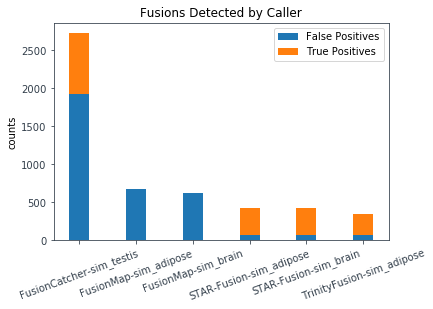

In [35]:
# 1 bar for each caller - truth, false
ind = range(6)

p1 = plt.bar(ind, 
        np.array(fusion_truth[fusion_truth["Fusion_Truth"]==False]["#FusionName"]), 
             width=0.35)
p2 = plt.bar(ind, 
        np.array(fusion_truth[fusion_truth["Fusion_Truth"]==True]["#FusionName"]), 
             bottom=np.array(fusion_truth[fusion_truth["Fusion_Truth"]==False]["#FusionName"]),
             width=0.35)

plt.ylabel("counts")
plt.title("Fusions Detected by Caller")
plt.xticks(ind, labels, rotation=20)
plt.legend((p1[0], p2[0]), ('False Positives', 'True Positives'))
plt.show()

### Check if FMap entails other fusions

In [ ]:
unified_subselect_df = unified_df_val[unified_df_val["FusionCaller"] == "FusionMap"]
#unified_subselect_df = unified_df_val
unified_subselect_df[["LChr", "LPos", "LType"]] = unified_subselect_df.LeftBreakpoint.str.split(":", expand=True)
unified_subselect_df[["RChr", "RPos", "RType"]] = unified_subselect_df.RightBreakpoint.str.split(":", expand=True)
print(unified_subselect_df.LChr.unique())
print(unified_subselect_df.RChr.unique())
unified_subselect_df

In [ ]:
chr_ix = ["chr{}".format(i+1) for i in range(22)]
chr_ix.append("chrX")
chr_ix.append("chrY")
heatmap_df = pd.DataFrame(np.zeros((len(chr_ix),len(chr_ix))), columns=chr_ix, index=chr_ix)
heatmap_df

In [ ]:
for l, r in zip(unified_subselect_df["LChr"], unified_subselect_df["RChr"]):
    if len(l) > 5:
        l = l[:5]
    if len(r) > 5:
        r = r[:5]
    if "_" in l:
        l = l.split("_")[0]
    if "_" in r:
        r = r.split("_")[0]
    heatmap_df.loc[l, r] += 1

In [ ]:
heatmap_df

In [ ]:
right_breaks = heatmap_df.sum()

left_breaks = heatmap_df.sum(axis=1)

In [ ]:
chr_range = np.arange(len(chr_ix))

fig, (ax0, ax1) = plt.subplots(1,2, figsize=(5,5))

im1 = ax0.imshow(heatmap_df)
im2 = ax1.imshow(heatmap_df)

fig.colorbar(im1, ax=ax1, orientation="horizontal")

ax0.set_title("Fusion Breakpoints X1")
ax0.set_xticks(chr_range)
ax0.set_xticklabels(list(heatmap_df))
ax0.set_yticks(chr_range)
ax0.set_yticklabels(list(heatmap_df))

ax1.set_title("Fusion Breakpoints X2")
ax1.set_xticks(chr_range)
ax1.set_xticklabels(list(heatmap_df))
ax1.set_yticks(chr_range)
ax1.set_yticklabels([])

plt.setp(ax0.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.setp(ax1.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

fig.tight_layout()
fig.show()

In [ ]:
chr_range = np.arange(len(chr_ix))

fig = plt.figure(figsize=(15,15))
gs  = gridspec.GridSpec(2, 2, height_ratios=[4, 1], width_ratios=[3,1])
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])
ax2 = plt.subplot(gs[2])
ax3 = plt.subplot(gs[3])
#fig.subplots_adjust(top=0.85)

im = ax0.imshow(heatmap_df, aspect="auto")
fig.colorbar(im, ax=ax1)

# plot heatmap of the distribution
ax0.set_title("Fusion Distributions over breakpoints (l|r)")
ax0.set_xticks(chr_range)
ax0.set_xticklabels([])
ax0.set_yticks(chr_range)
ax0.set_yticklabels(list(heatmap_df.index))

# add text to fields
for i in chr_range:
    for j in chr_range:
        text = ax0.text(j, i, heatmap_df.iloc[i, j],
                       ha="center", va="center", color="w")

# add barplot for right break distribution
ax2.bar(chr_range, right_breaks, align="edge")
ax2.set_xlim(0, len(chr_range))
ax2.set_ylim(0, max(right_breaks)+5 )
ax2.set_xticks(chr_range)
ax2.set_xticklabels(list(heatmap_df))

# add barplot for left break distribution
# reindex reverse sort of left breakage otherwise reversed
ax1.barh(chr_range, left_breaks.iloc[::-1], align="edge")
ax1.set_ylim(0, len(chr_range))
ax1.set_xlim(0, max(left_breaks)+5 )
ax1.set_xticks(np.arange(0, max(left_breaks)+5, step=20, dtype=int))
ax1.set_xticklabels(np.arange(0, max(left_breaks)+5, step=20, dtype=int))
ax1.set_yticks([])

ax3.axis("off")

plt.setp(ax2.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")


#fig.colorbar(c, ax)

fig.tight_layout()
fig.show()